<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/Teste_MelhoresMeses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=Tv2-BGOLf9E


# Usando Investing.com

In [ ]:
!pip install investpy
!pip install yfinance

In [280]:
import yfinance as yf
import investpy as ip
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np

In [340]:
indices = ip.get_indices_list('brazil')
indices

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [341]:
indice_escolhido = 'BM&FBOVESPA Real Estate IFIX'

In [349]:
ano_inicial = 2012
ano_final = 2021
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
anos = list(range(ano_inicial, ano_final+1))
#anos

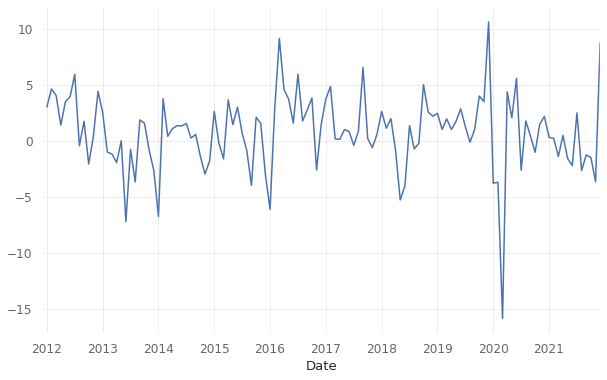

In [350]:
df = ip.get_index_historical_data(indice_escolhido, country='Brazil', from_date='01/12/' + str(ano_inicial-1), to_date='31/12/' + str(ano_final), interval="monthly")
df['Variacao'] = df['Close'].pct_change()*100
df['Variacao'].plot()

In [352]:
valores_mensais = np.random.rand(len(anos), len(meses))

df_temp = df.iloc[1: , :]
df_temp = df_temp[['Variacao']]
df_temp["Data"] = df_temp.index
df_temp["Ano"] = df_temp["Data"].map(lambda x: str(x)[0:4])
df_temp["Mes"] = df_temp["Data"].map(lambda x: str(x)[5:7])
df_temp.drop('Data', axis='columns', inplace=True)
dados = df_temp.values.tolist()
#dados

In [353]:
ano_atual = dados[0][1]
# ano_atual

linha = []
valores = []

for valor, ano, mes in dados:
   if(ano == ano_atual):
     linha.append(round(valor, 2))
   else:
     valores.append(linha)
     ano_atual = ano
     linha = []
     linha.append(round(valor, 2))
valores.append(linha)

#valores

In [357]:
fig = px.imshow(valores, 
                labels=dict(x="Mês", y="Ano", color="Retorno (%)"),
                y=anos,
                x=meses,
                text_auto=True, aspect="auto", width=1000, height=1000, color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title='Retorno mensal (%) do ' + indice_escolhido + ' entre ' + str(anos[0]) + ' e ' + str(anos[-1]),
    xaxis_nticks=36, )

fig.show()

In [356]:
medias = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
for linha in valores:
  medias = np.add(medias, np.array(linha))
medias = np.true_divide(medias, len(anos))
medias = np.round(medias, 2)

fig = px.imshow([medias], 
                labels=dict(x="Mês", y="Média", color="Rentabilidade"),
                y=['Média'],
                x=meses,
                text_auto=True, aspect="auto", width=1000, height=300)

fig.update_layout(
    title='Retorno médio mensal (%) do ' + indice_escolhido + ' entre ' + str(anos[0]) + ' e ' + str(anos[-1]),
    xaxis_nticks=36)

fig.show()

# Usando Quantstats

In [ ]:
!pip install quantstats

In [ ]:
import quantstats as qs

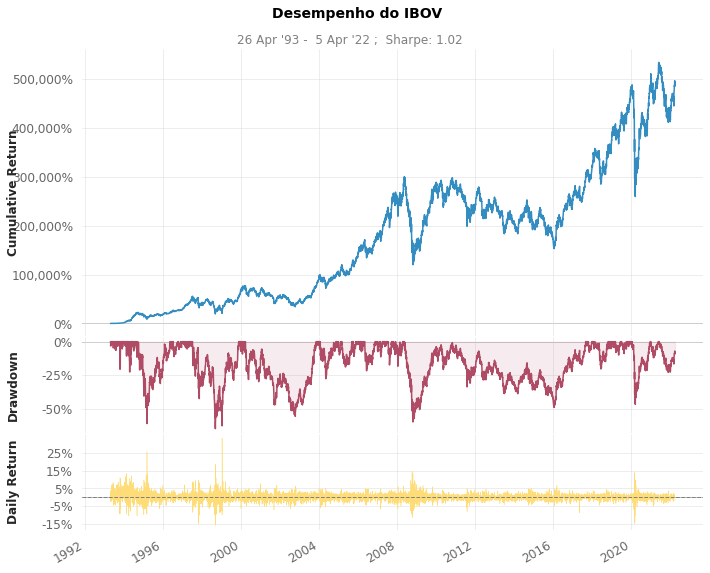

In [ ]:
df = qs.utils.download_returns("^BVSP", period="max")
qs.plots.snapshot(df, title="Desempenho do IBOV", )


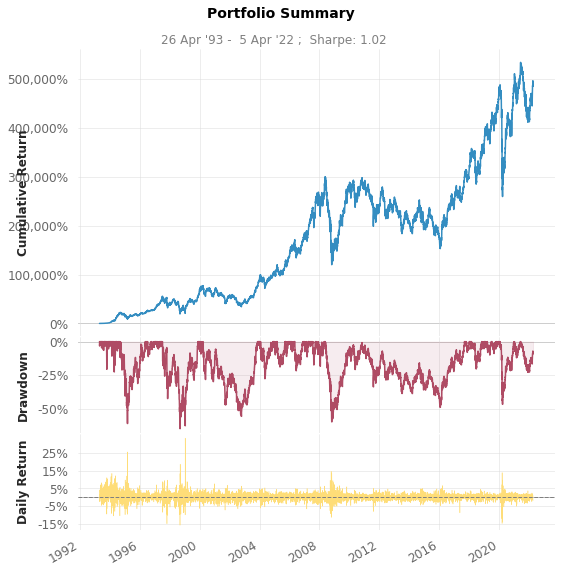

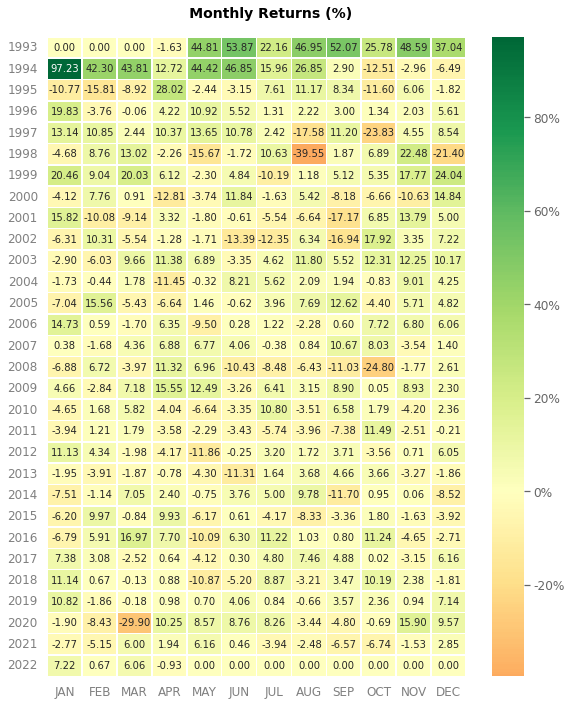

In [ ]:
qs.reports.plots(df)